# Evolution of Coronal hole from east limb to west limb 

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns


In [6]:
# Define the data
data = {
    "S.N": [f"t{i+1}" for i in range(24)],
    "Date": [
        "2015/07/04", "2015/07/04", "2015/07/04", "2015/07/04",
        "2015/07/05", "2015/07/05", "2015/07/05", "2015/07/05",
        "2015/07/06", "2015/07/06", "2015/07/06", "2025/07/06",
        "2015/07/07", "2015/07/07", "2015/07/07", "2015/7/7",
        "2015/07/08", "2015/07/08", "2015/07/08", "2015/07/08",
        "2015/07/09", "2015/07/09", "2015/07/09", "2015/07/09"
    ],
    "Time": ["06:44:10", "11:44:10", "18:44:10", "23:44:10"] * 6,
    "Center (arcsec)": [
        "(-691,-58)", "(-654,-54)", "(-605,-41)", "(-569,-32)",
        "(-513,-31)", "(-473,-30)", "(-409,-33)", "(-362,-38)",
        "(-300,-40)", "(-253,-42)", "(-183,-43)", "(-133,-43)",
        "(-69,-39)", "(-17,-51)", "(53,-47)", "(104,-45)",
        "(174,-46)", "(226,-45)", "(302,-54)", "(339,-55)",
        "(404,-70)", "(445,-69)", "(504,-61)", "(545,-60)"
    ],
    "Skewness": [
        0.24, 0.30, 0.35, 0.37,
        0.38, 0.38, 0.37, 0.37,
        0.36, 0.35, 0.34, 0.36,
        0.36, 0.37, 0.37, 0.38,
        0.38, 0.36, 0.36, 0.33,
        0.33, 0.34, 0.26, 0.26
    ],
    "+ve_polarity": [
        61, 65, 68, 70,
        71, 72, 70, 71,
        70, 69, 69, 69,
        70, 71, 71, 72,
        72, 70, 69, 68,
        68, 68, 64, 64
    ],
    "-ve_polarity": [
        38, 34, 31, 29,
        28, 27, 30, 28,
        29, 30, 30, 30,
        29, 28, 28, 27,
        27, 29, 30, 31,
        31, 31, 35, 35
    ],
    "Imbalance": [
        24, 30, 37, 42,
        43, 44, 40, 42,
        40, 39, 40, 39,
        41, 44, 43, 44,
        44, 41, 39, 36,
        37, 37, 29, 29
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create directory if it doesn't exist
save_dir = "/Users/khagendrakatwal/Desktop/Paper_one/Code/DATA"
os.makedirs(save_dir, exist_ok=True)

# Save path
save_path = os.path.join(save_dir, "Coronal_hole_evolution_from_east_to_west.csv")
df.to_csv(save_path, index=False)

print(f"✅ CSV file saved to: {save_path}")


✅ CSV file saved to: /Users/khagendrakatwal/Desktop/Paper_one/Code/DATA/Coronal_hole_evolution_from_east_to_west.csv


# First Plot: Comparing the coronal with Quiet sun ,Second Plot: Evolution of Coronal Holes 


In [7]:
sns.set(style="white")

# Font size setting for uniform styling
font_size = 20

skewness_values = [0.10, 0.037, 0.10, 0.013, 0.07, 0.01, 0.10, 0.10, 0.033, 0.035,
                   0.04, 0.0012, -0.004, -0.10, -0.05, -0.05, -0.04, 0.11, 0.069, 0.067]
time_labels = [f"t{i+1}" for i in range(len(skewness_values))]
#Read data 
df = pd.read_csv("/Users/khagendrakatwal/Desktop/Paper_one/Code/DATA/Coronal_hole_evolution_from_east_to_west.csv")
x, y, center = df["S.N"], df["Skewness"], df["Center (arcsec)"]

#Combined Figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), dpi=600)

# Top Plot: QS and RCH Skewness 
ax1.scatter(time_labels, skewness_values, marker='*', color='blue', s=70,
            edgecolor='black', label='QS - Quiet Sun')
ax1.scatter('t12', -0.38, color='red', s=90, edgecolor='black',
            zorder=5, label='RCH - Reference Coronal Hole')
ax1.annotate('RCH', xy=('t12', -0.38), xytext=('t12', -0.28), color='red',
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=font_size, ha='center')
ax1.set(xlabel='Time [2016-02-02   2016-03-12]', ylabel='Skewness')
ax1.set_xticks(range(len(time_labels)))
ax1.set_xticklabels(time_labels, rotation=45, fontsize=font_size)
ax1.tick_params(axis='y', labelsize=font_size)
ax1.invert_yaxis()
ax1.legend(fontsize=font_size)
ax1.set_ylabel("Skewness", fontsize=font_size)
ax1.set_xlabel("Time [2016-02-02   2016-03-12]", fontsize=font_size)
ax1.text(0.01, 0.95, "a", transform=ax1.transAxes,
         fontsize=font_size, fontweight='bold', va='top', ha='left')

#Bottom Plot: Coronal Hole Evolution
ax2.scatter(x, y, color='red', marker='.', s=70, label="Coronal Hole")
for i, (x_val, y_val, label) in enumerate(zip(x, y, center)):
    ax2.annotate(f"{label}", (i, y_val + 0.006), ha='center', fontsize=font_size - 6)
ax2.set(ylim=(0.20, 0.42))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_xticks(range(len(x)))
ax2.set_xticklabels(x, rotation=45, fontsize=font_size)
ax2.tick_params(axis='y', labelsize=font_size)
ax2.legend(fontsize=font_size)
ax2.set_ylabel("Skewness", fontsize=font_size)
ax2.set_xlabel("Time [2015-07-03    2015-07-10]", fontsize=font_size)
ax2.text(0.01, 0.95, "b", transform=ax2.transAxes,
         fontsize=font_size, fontweight='bold', va='top', ha='left')
#Final layout and save
plt.tight_layout(pad=2.0)
plt.savefig("/Users/khagendrakatwal/Desktop/QS_RCH_and_CH_Evolution.pdf", bbox_inches='tight')
plt.show()

# EAST WEST Evolution of COronal holes.

In [14]:
# -------------------------------------------------
# Global ApJ-safe style (simple & consistent)
# -------------------------------------------------
plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "font.size": 40,          # single global control
    "axes.labelsize": 40,
    "axes.titlesize": 40,
    "xtick.labelsize": 40,
    "ytick.labelsize": 40,
    "legend.fontsize": 40,
    "xtick.direction": "in",
    "ytick.direction": "in",
})

# -------------------------------------------------
# Read data
# -------------------------------------------------
df = pd.read_csv(
    "/Users/khagendrakatwal/Desktop/Paper_one/Code/DATA/Coronal_hole_evolution_from_east_to_west.csv"
)

x = df["S.N"]
y = df["Skewness"]
center = df["Center (arcsec)"]

# -------------------------------------------------
# Create figure
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(50, 20), dpi=300)

# -------------------------------------------------
# Scatter plot
# -------------------------------------------------
ax.scatter(
    x, y,
    color="red",
    marker=".",
    s=90,
    label="Coronal Hole"
)

# -------------------------------------------------
# Annotate coronal hole center positions
# -------------------------------------------------
for i, (y_val, lab) in enumerate(zip(y, center)):
    ax.annotate(
        f"{lab}",
        (i, y_val + 0.006),
        ha="center"
    )

# -------------------------------------------------
# Axis limits and ticks
# -------------------------------------------------
ax.set_ylim(0.20, 0.42)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=45)

# -------------------------------------------------
# Labels & title
# -------------------------------------------------
ax.set_ylabel(r"Skewness ($S$)")
ax.set_xlabel("Time [2015-07-03 – 2015-07-10]")
ax.set_title("Coronal Hole Evolution")

# -------------------------------------------------
# Legend
# -------------------------------------------------
ax.legend()

# -------------------------------------------------
# Save
# -------------------------------------------------
plt.tight_layout(pad=2.0)
plt.savefig(
    "/Users/khagendrakatwal/Desktop/CH_Evolution_only.pdf",
    bbox_inches="tight"
)
plt.show()


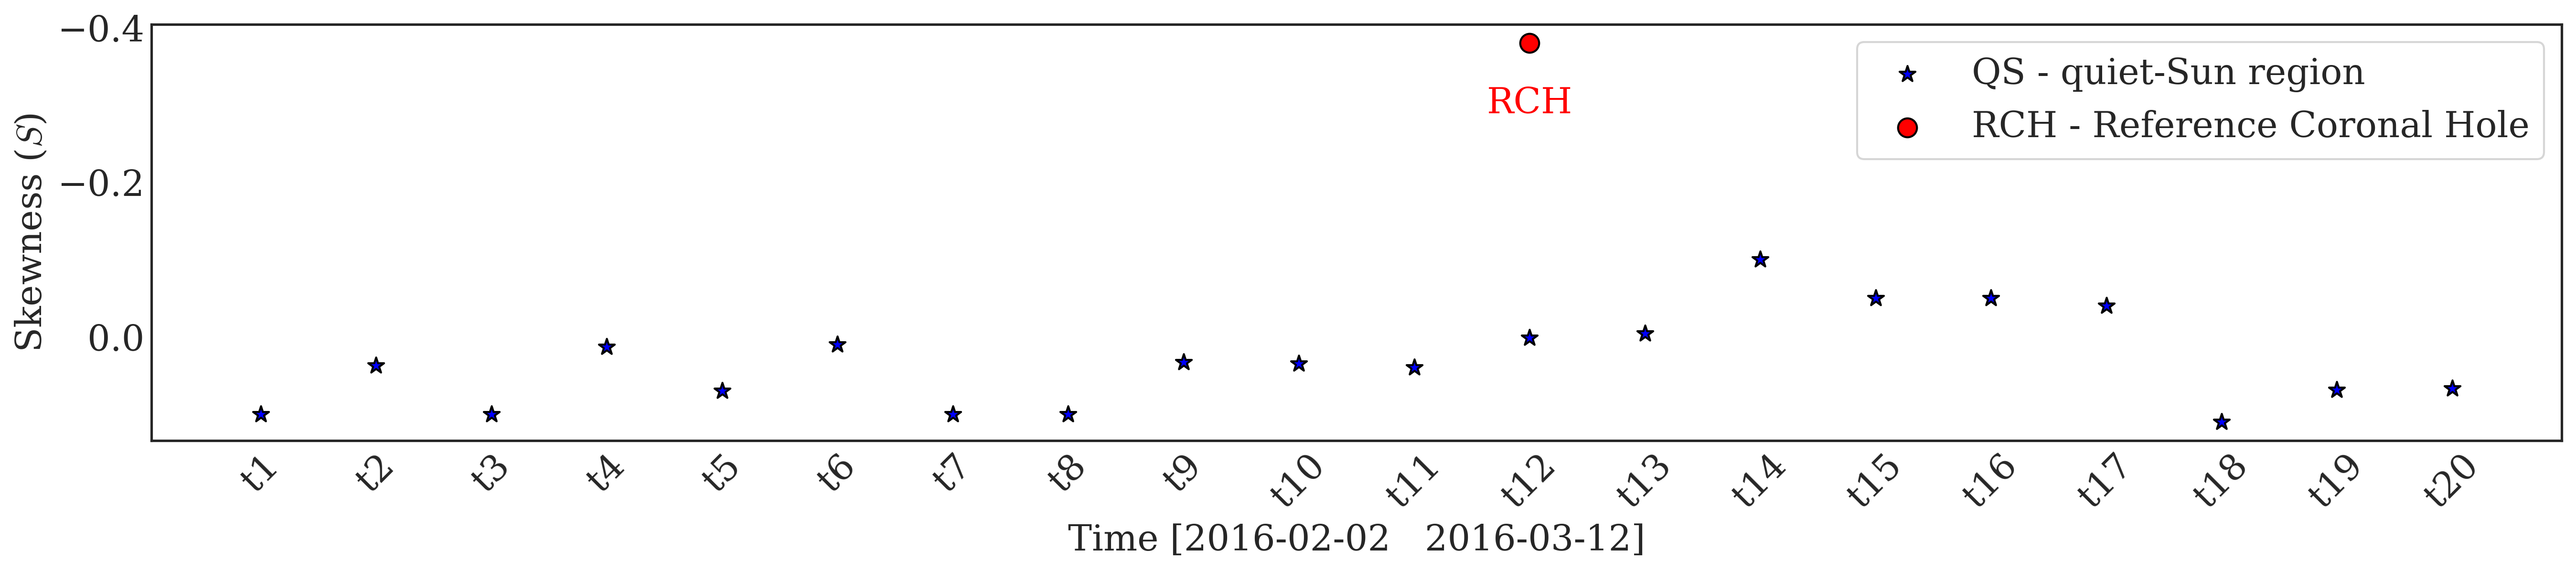

In [15]:
skewness_values = [0.10, 0.037, 0.10, 0.013, 0.07, 0.01, 0.10, 0.10, 0.033, 0.035,
                   0.04, 0.0012, -0.004, -0.10, -0.05, -0.05, -0.04, 0.11, 0.069, 0.067]
time_labels = [f"t{i+1}" for i in range(len(skewness_values))]

# Figure
fig, ax1 = plt.subplots(1, 1, figsize=(20, 6), dpi=300)

# QS points
ax1.scatter(time_labels, skewness_values, marker="*", color="blue", s=70,
            edgecolor="black", label="QS - quiet-Sun region")

# RCH reference point
ax1.scatter("t12", -0.38, color="red", s=90, edgecolor="black",
            zorder=5, label="RCH - Reference Coronal Hole")

# Annotation (NO ARROW)
ax1.text("t12", -0.28, "RCH", color="red",
         fontsize=18, ha="center", va="bottom")

# Labels and formatting
ax1.set_ylabel(r"Skewness ($S$)", fontsize=18)
ax1.set_xlabel("Time [2016-02-02   2016-03-12]", fontsize=18)

ax1.set_xticks(range(len(time_labels)))
ax1.set_xticklabels(time_labels, rotation=45, fontsize=18)
ax1.tick_params(axis="y", labelsize=18)

ax1.invert_yaxis()
ax1.legend(fontsize=18)

plt.tight_layout(pad=2.0)
plt.savefig("/Users/khagendrakatwal/Desktop/QS_RCH_Skewness_only.pdf", bbox_inches="tight")
plt.show()